# Importing Libraries

In [4]:
import tensorflow as tf # Imports tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd 
import matplotlib
import seaborn as sns
import sklearn

from imblearn.over_sampling import RandomOverSampler 
import imblearn
#from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters


# Import Data

In [5]:
import pandas as pd
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
data


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [7]:
data.columns

Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346', 'pixel2347',
       'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351', 'label'],
      dtype='object', length=2353)

In [8]:
data.isnull().any().sum()

0

In [9]:
y = data['label']
x = data.drop(columns = ['label'])

# Exploratory Data Analysis (EDA)

In [10]:
tabular_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [11]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}
#classes = {'mel':0 ,'vasc':1,'df':2,'nv':3,'bkl':4,'bcc':5,'ak':6}

# Frequency Distribution of Classes

Text(0.5, 1.0, 'Frequency Distribution of Classes')

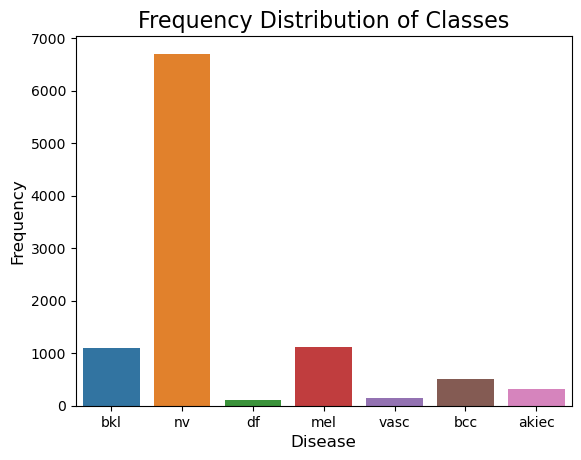

In [12]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

# Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

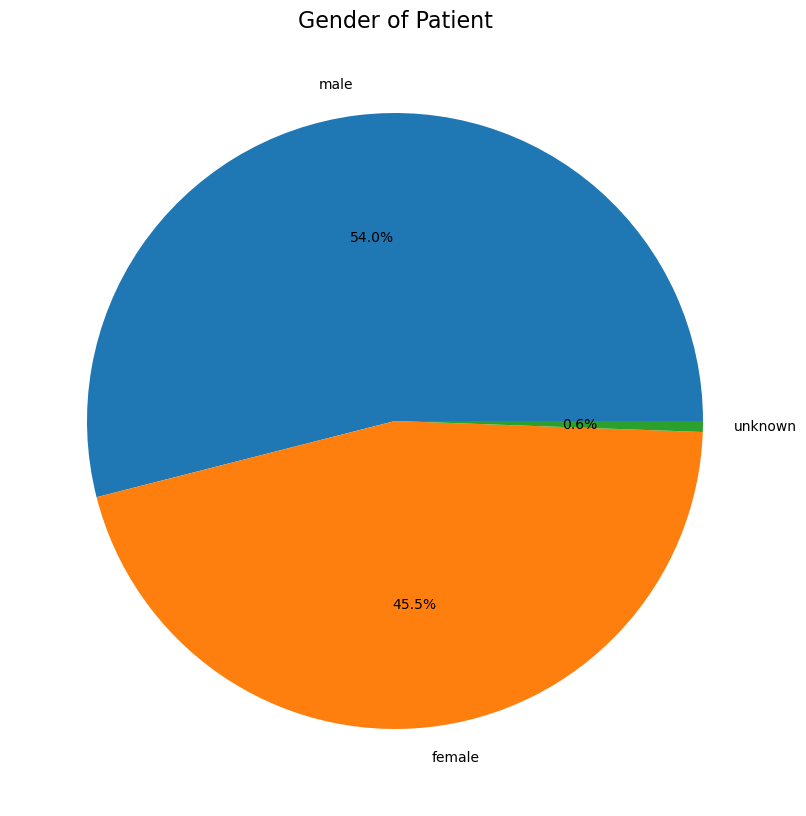

In [13]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

# Histogram of Age of Patients

Text(0.5, 1.0, 'Histogram of Age of Patients')

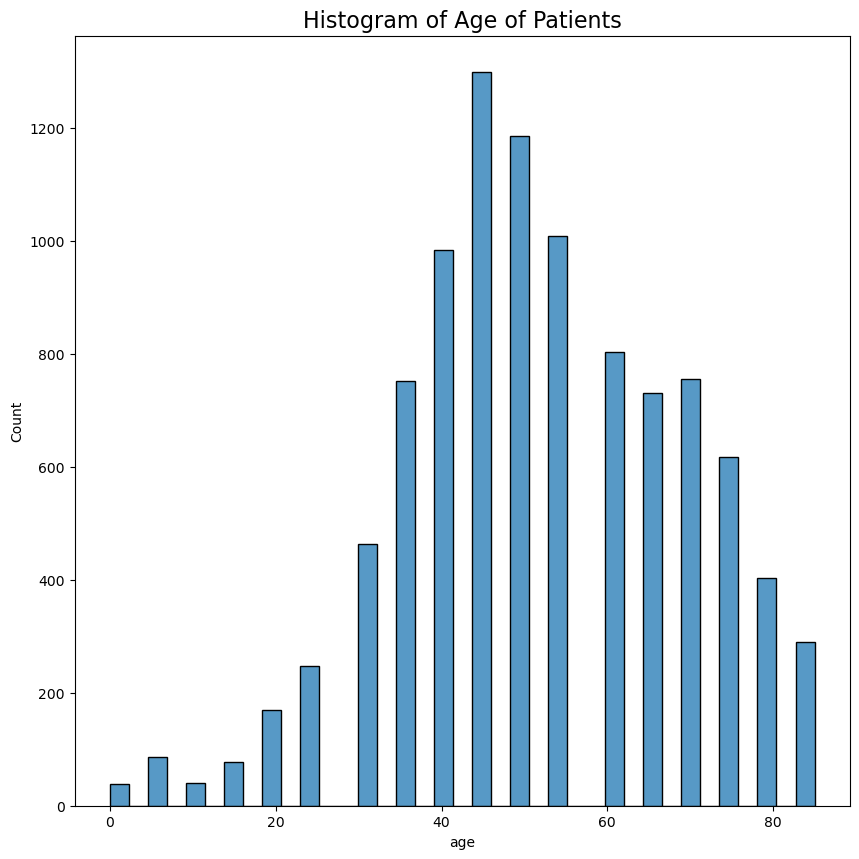

In [14]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

# Location of disease over Gender

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

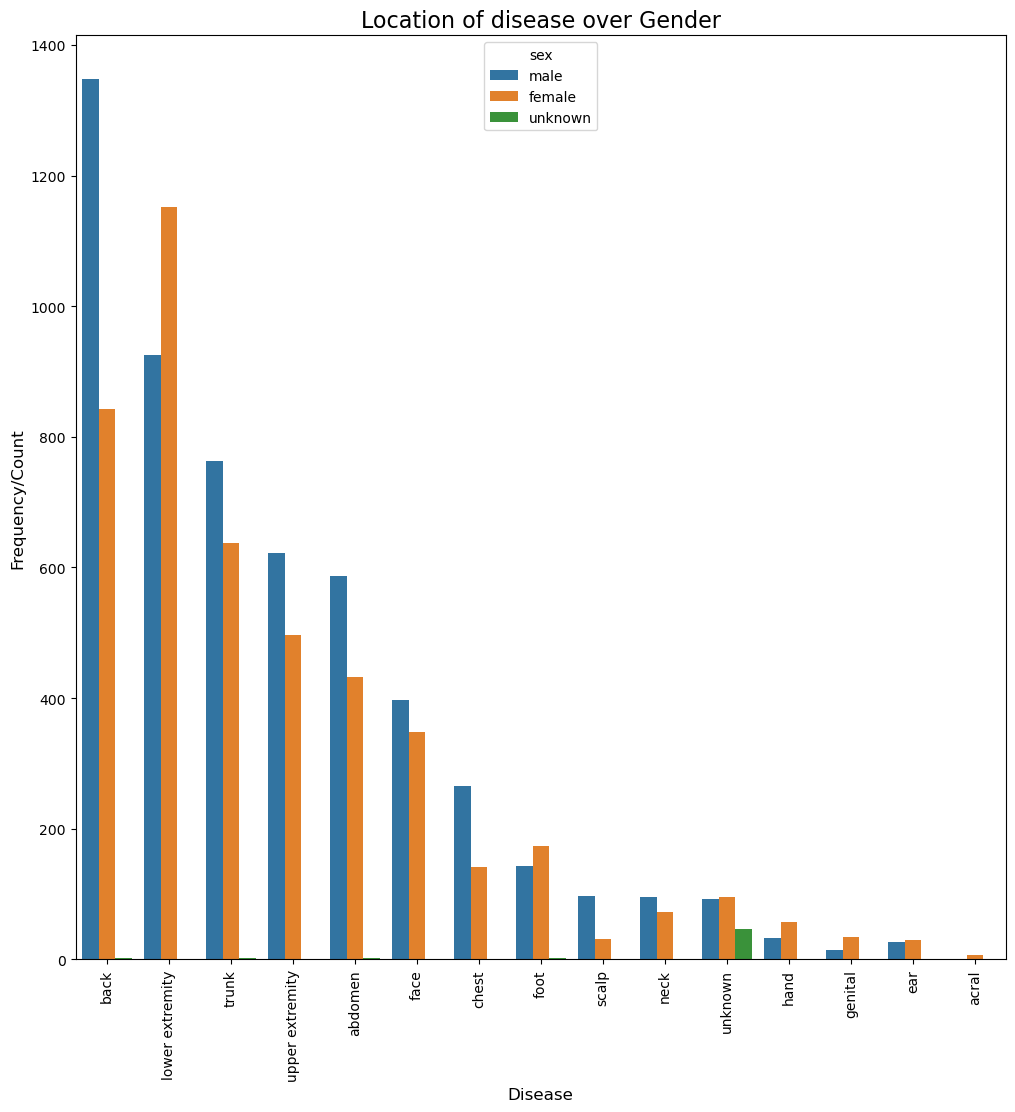

In [15]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

# Oversampling
**To overcome class imbalace**

In [16]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [17]:
x= np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)


Shape of X : (46935, 28, 28, 3)


In [18]:
y = to_categorical(y)

In [19]:
y.shape

(46935, 7)

# Standardization and Splitting Data

In [20]:
x = (x-np.mean(x))/np.std(x)

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [21]:
Y_train.shape

(37548, 7)

# Model Training

In [22]:
def blockred(inp,filters):
    #Inception
    x = Conv2D(filters, 1, activation="relu",padding='same',use_bias=False)(inp)
    x = layers.MaxPooling2D(2)(x)
    x = BatchNormalization(axis=1)(x)
    
    #VGG + SQuizenet
    y = Conv2D(filters*2,3,activation="relu", padding='same',use_bias=False,)(inp)
    y = Conv2D(filters,3,activation="relu", padding='same',use_bias=False,)(y)
    y = layers.MaxPooling2D(2)(y)
    y = BatchNormalization(axis=1)(y)
    y = Dropout(0.25)(y)
    
    #InceptionResnet+Squize
    z = Conv2D(filters*2, 3, activation="relu", padding='same',use_bias=False)(inp)
    z = Conv2D(filters, 1, activation="relu", padding='same',use_bias=False)(inp)  
    z = layers.MaxPooling2D(2)(z)
    z = BatchNormalization(axis=1)(z)
    output1 = layers.add([x,y,z])
    return output1

**Pretrained Model **

In [23]:
Name= "CNN0"
inputs = keras.Input(shape=(28,28,3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)

bl1=blockred(x,32)

bl2=blockred(bl1,64)

bl3=blockred(bl2,64)

# y = Conv2D(filters=128, kernel_size=(5, 5), activation='relu')(bl3)
# y = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(y)
# y = MaxPooling2D(pool_size=(2, 2))(y)
# y = BatchNormalization(axis=-1)(y)
# y = Dropout(0.25)(y)
y = Flatten()(bl3)
y = Dense(256, activation='relu')(y)
y = Dropout(0.5)(y)
y = Dense(64, activation='relu')(y)
y = Dropout(0.5)(y)
outputs=Dense(7, activation='softmax')(y)
model = keras.Model(inputs, outputs, name=Name)
print(model.summary())

Model: "CNN0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_2 (Conv2D)              (None, 26, 26, 64)   18432       ['conv2d[0][0]']                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 26, 26, 32)   18432       ['conv2d_2[0][0]']               
                                                                                               

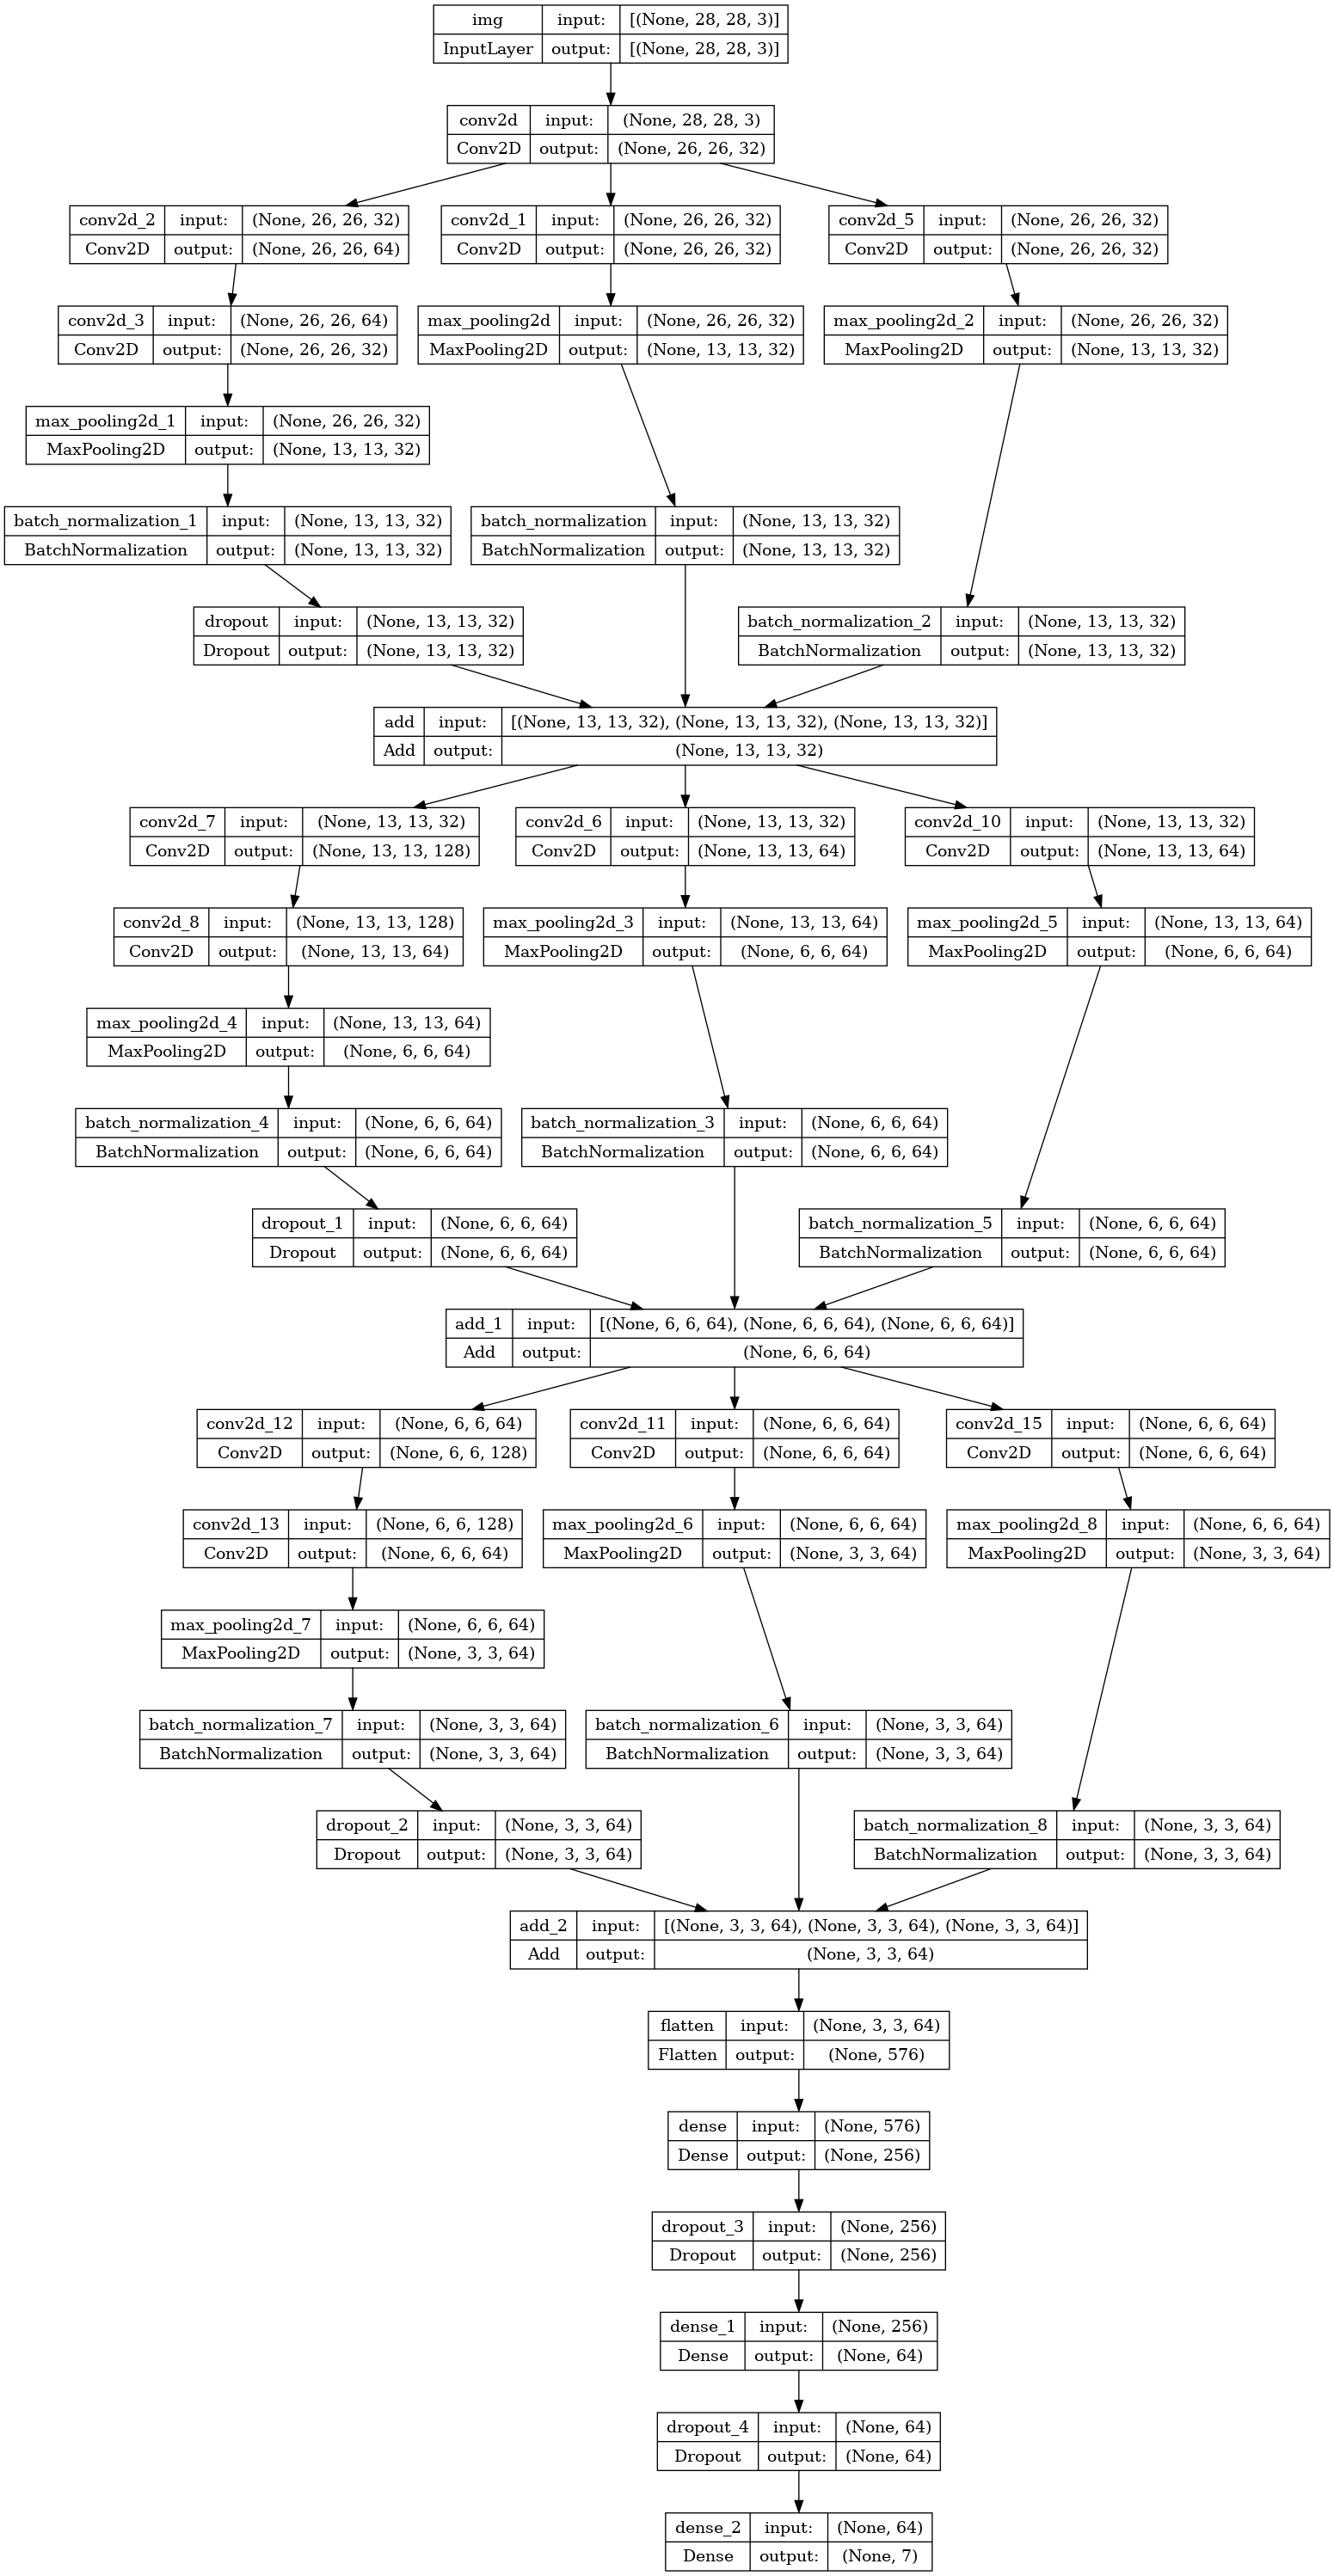

In [24]:
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)

In [25]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)


In [28]:
model.compile(optimizer= keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy() ,
              metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test), batch_size=512, callbacks=[callback])


Epoch 1/30
74/74 [==============================] - ETA: 0s - loss: 1.3928 - acc: 0.4495 - recall_2: 0.2142 - precision_2: 0.7017 - auc_2: 0.8313 - true_positives_2: 8042.0000 - true_negatives_2: 221870.0000 - false_negatives_2: 29506.0000 - false_positives_2: 3418.0000
Epoch 1: saving model to best_model.h5
74/74 [==============================] - 287s 4s/step - loss: 1.3928 - acc: 0.4495 - recall_2: 0.2142 - precision_2: 0.7017 - auc_2: 0.8313 - true_positives_2: 8042.0000 - true_negatives_2: 221870.0000 - false_negatives_2: 29506.0000 - false_positives_2: 3418.0000 - val_loss: 1.9035 - val_acc: 0.2042 - val_recall_2: 0.0125 - val_precision_2: 0.9360 - val_auc_2: 0.6602 - val_true_positives_2: 117.0000 - val_true_negatives_2: 56314.0000 - val_false_negatives_2: 9270.0000 - val_false_positives_2: 8.0000
Epoch 2/30
74/74 [==============================] - ETA: 0s - loss: 1.1507 - acc: 0.5561 - recall_2: 0.3473 - precision_2: 0.7507 - auc_2: 0.8887 - true_positives_2: 13041.0000 - true_

In [29]:
model.save(Name+'.h5')

pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)

# Plot Accuracy and Loss

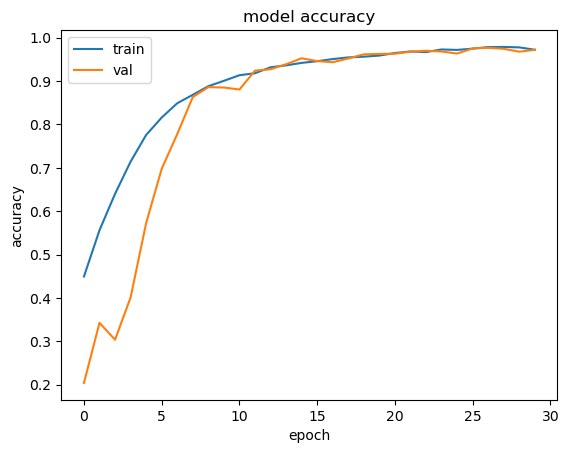

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

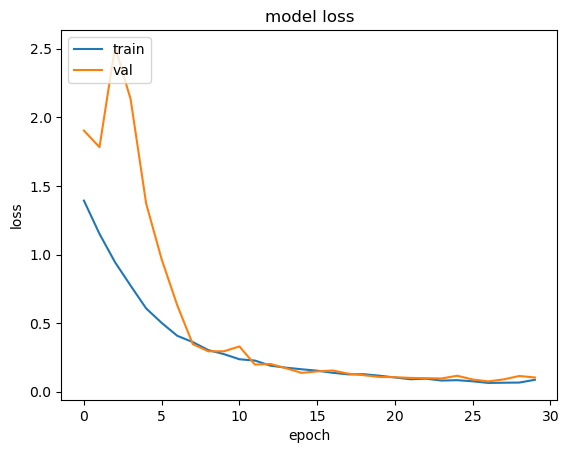

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

294/294 [==============================] - 15s 49ms/step


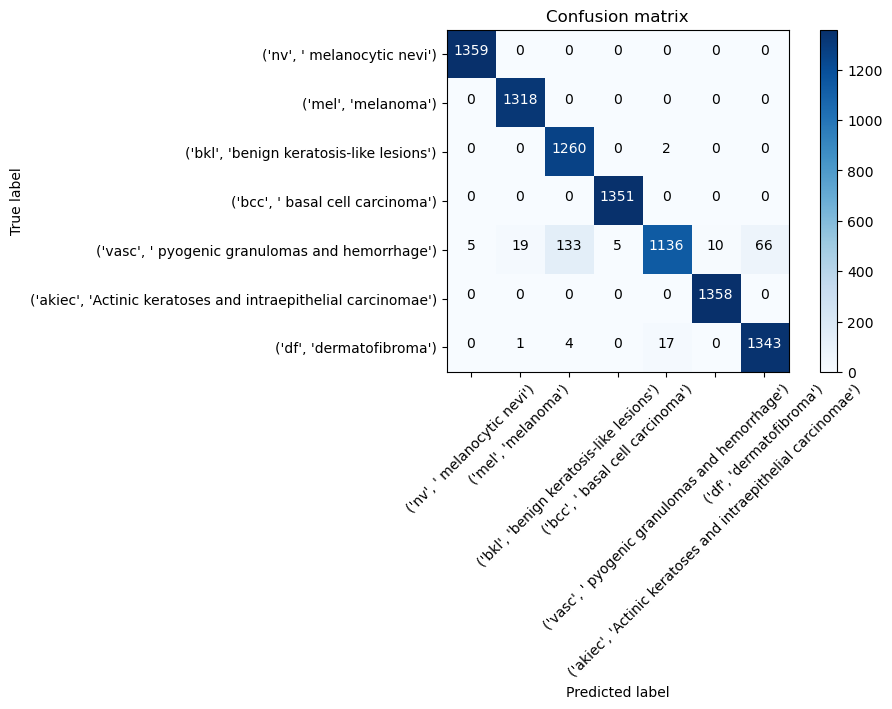

In [34]:
import itertools
from sklearn.metrics import confusion_matrix
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax = plt.subplots(figsize = (10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(np.argmax(Y_test,axis=1), Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes.values()) 


In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
Y_pred = np.argmax(model.predict(X_test),axis=1)
print(classification_report(np.float32(np.argmax(Y_test,axis=1)), Y_pred.round()))
print('Classification Report')

294/294 [==============================] - 15s 50ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1359
         1.0       0.99      1.00      0.99      1318
         2.0       0.90      1.00      0.95      1262
         3.0       1.00      1.00      1.00      1351
         4.0       0.98      0.83      0.90      1374
         5.0       0.99      1.00      1.00      1358
         6.0       0.95      0.98      0.97      1365

    accuracy                           0.97      9387
   macro avg       0.97      0.97      0.97      9387
weighted avg       0.97      0.97      0.97      9387

Classification Report


# **For Transfer Learning**

In [36]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet_v2 import ResNet152V2

from tensorflow.keras.applications.efficientnet import EfficientNetB7

In [37]:
X_train_pad= np.pad(X_train,((0,0),(2,2),(2,2),(0,0)),'mean')

In [38]:
X_test_pad= np.pad(X_test,((0,0),(2,2),(2,2),(0,0)),'mean')

In [39]:

img_shape =(32,32,3)

Name= "ResNet"
classifier = ResNet152V2(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )
fine_tune_at = 555
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
print(model.summary())


234545216/234545216 [==============================] - 9s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 1, 1, 2048)        58331648  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_9 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                       

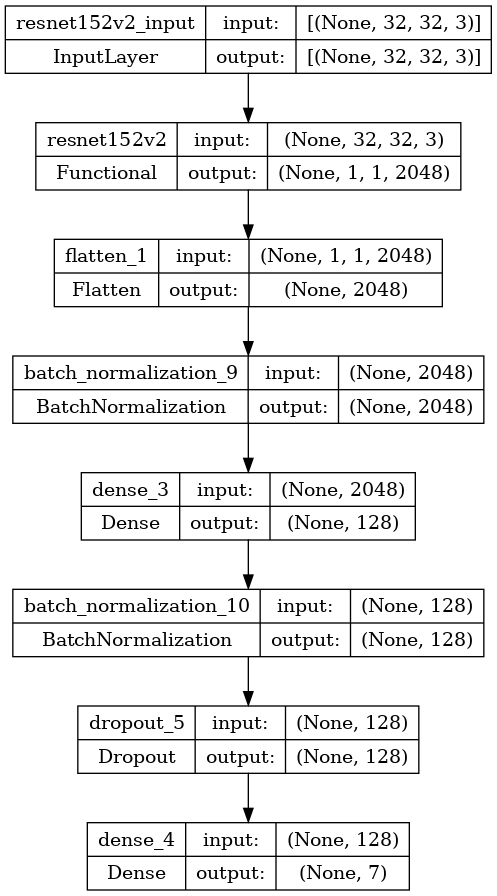

In [40]:
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)

In [41]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_Resnet.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [42]:
model.compile(optimizer= keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy() ,
              metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
history = model.fit(X_train_pad, Y_train, epochs=30, validation_data=(X_test_pad, Y_test), batch_size=512, callbacks=[callback])

Epoch 1/30
74/74 [==============================] - ETA: 0s - loss: 1.0500 - acc: 0.6592 - recall_3: 0.5448 - precision_3: 0.7906 - auc_3: 0.9124 - true_positives_3: 20456.0000 - true_negatives_3: 219869.0000 - false_negatives_3: 17092.0000 - false_positives_3: 5419.0000
Epoch 1: saving model to best_Resnet.h5
74/74 [==============================] - 354s 5s/step - loss: 1.0500 - acc: 0.6592 - recall_3: 0.5448 - precision_3: 0.7906 - auc_3: 0.9124 - true_positives_3: 20456.0000 - true_negatives_3: 219869.0000 - false_negatives_3: 17092.0000 - false_positives_3: 5419.0000 - val_loss: 1.4686 - val_acc: 0.4460 - val_recall_3: 0.1784 - val_precision_3: 0.6776 - val_auc_3: 0.8078 - val_true_positives_3: 1675.0000 - val_true_negatives_3: 55525.0000 - val_false_negatives_3: 7712.0000 - val_false_positives_3: 797.0000
Epoch 2/30
74/74 [==============================] - ETA: 0s - loss: 0.3377 - acc: 0.8869 - recall_3: 0.8590 - precision_3: 0.9161 - auc_3: 0.9893 - true_positives_3: 32253.0000 -

In [43]:
model.save(Name+'.h5')

pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)

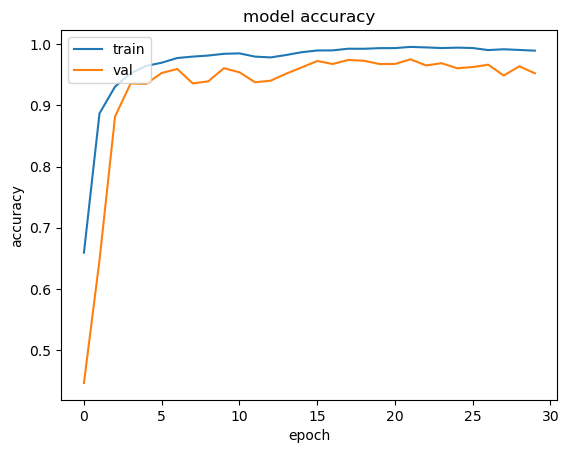

In [44]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

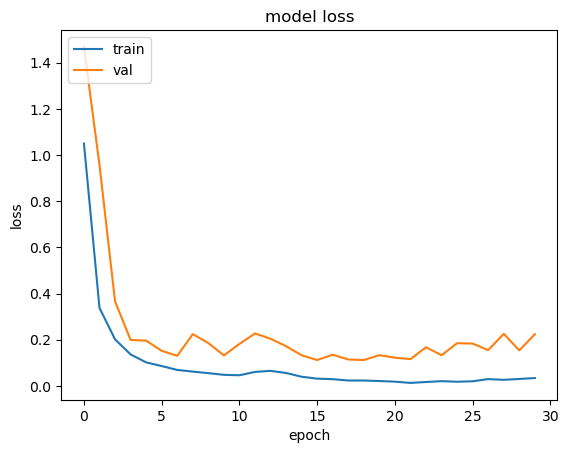

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
loss, acc,rec, = model.evaluate(X_test_pad, Y_test, verbose=1)

294/294 [==============================] - 81s 277ms/step - loss: 0.2235 - acc: 0.9527 - recall_3: 0.9517 - precision_3: 0.9545 - auc_3: 0.9916 - true_positives_3: 8934.0000 - true_negatives_3: 55896.0000 - false_negatives_3: 453.0000 - false_positives_3: 426.0000


ValueError: too many values to unpack (expected 3)

294/294 [==============================] - 86s 280ms/step


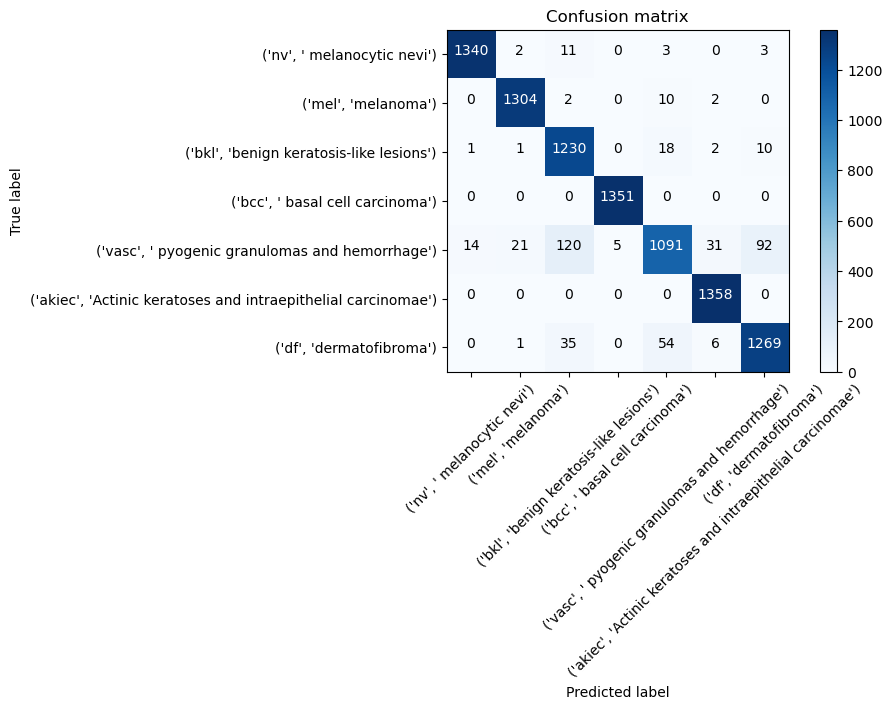

In [47]:
import itertools
from sklearn.metrics import confusion_matrix
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig, ax = plt.subplots(figsize = (10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Predict the values from the validation dataset
Y_pred = model.predict(X_test_pad)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(np.argmax(Y_test,axis=1), Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes.values()) 

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
Y_pred = np.argmax(model.predict(X_test_pad),axis=1)
print(classification_report(np.float32(np.argmax(Y_test,axis=1)), Y_pred.round()))
print('Classification Report')

294/294 [==============================] - 80s 274ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1359
         1.0       0.98      0.99      0.99      1318
         2.0       0.88      0.97      0.92      1262
         3.0       1.00      1.00      1.00      1351
         4.0       0.93      0.79      0.86      1374
         5.0       0.97      1.00      0.99      1358
         6.0       0.92      0.93      0.93      1365

    accuracy                           0.95      9387
   macro avg       0.95      0.95      0.95      9387
weighted avg       0.95      0.95      0.95      9387

Classification Report
